<a href="https://colab.research.google.com/github/summerolmstead/Spotify-Top-Songs-2023-Analysis/blob/main/Spotify_Top_Songs_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summer Olmstead

Data Visualization , Assignment 2 | Dataset 3 (6 Attributes) TOP SPOTIFY 2023

https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

# Importing Dataset

In [1]:
import kagglehub
import os

path = kagglehub.dataset_download("nelgiriyewithana/top-spotify-songs-2023")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/top-spotify-songs-2023/versions/1


In [2]:
dataset_files = os.listdir(path)
print("Dataset files:", dataset_files)

Dataset files: ['spotify-2023.csv']


In [3]:
import pandas as pd

csv_file_path = os.path.join(path, 'spotify-2023.csv')
df = pd.read_csv(csv_file_path,encoding='ISO-8859-1') #must use this encoding bc default didnt work

print(df.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [4]:
print(df.describe())

       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000          

# Data Preprocessing

In [22]:
#duplicate rows
print(df.duplicated().sum())

df.drop_duplicates(inplace=True) # getting rid of potential dupes even tho there is 0 haha

df.dropna(inplace=True) # dropping nans / missing

#check for categorical columns - will one hot encode if keep later
print(df.select_dtypes(include=['object']).columns)

0
Index(['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists',
       'in_shazam_charts', 'key', 'mode'],
      dtype='object')


In [6]:
print(df.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [7]:
#select only the relevant columns
df_selected = df[['track_name', 'artist(s)_name', 'streams', 'energy_%', 'danceability_%', 'speechiness_%']]

#check the first few rows of the cleaned DataFrame
print(df_selected.head())

                            track_name    artist(s)_name    streams  energy_%  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook  141381703        83   
1                                 LALA       Myke Towers  133716286        74   
2                              vampire    Olivia Rodrigo  140003974        53   
3                         Cruel Summer      Taylor Swift  800840817        72   
4                       WHERE SHE GOES         Bad Bunny  303236322        80   

   danceability_%  speechiness_%  
0              80              4  
1              71              4  
2              51              6  
3              55             15  
4              65              6  


# Data Analysis

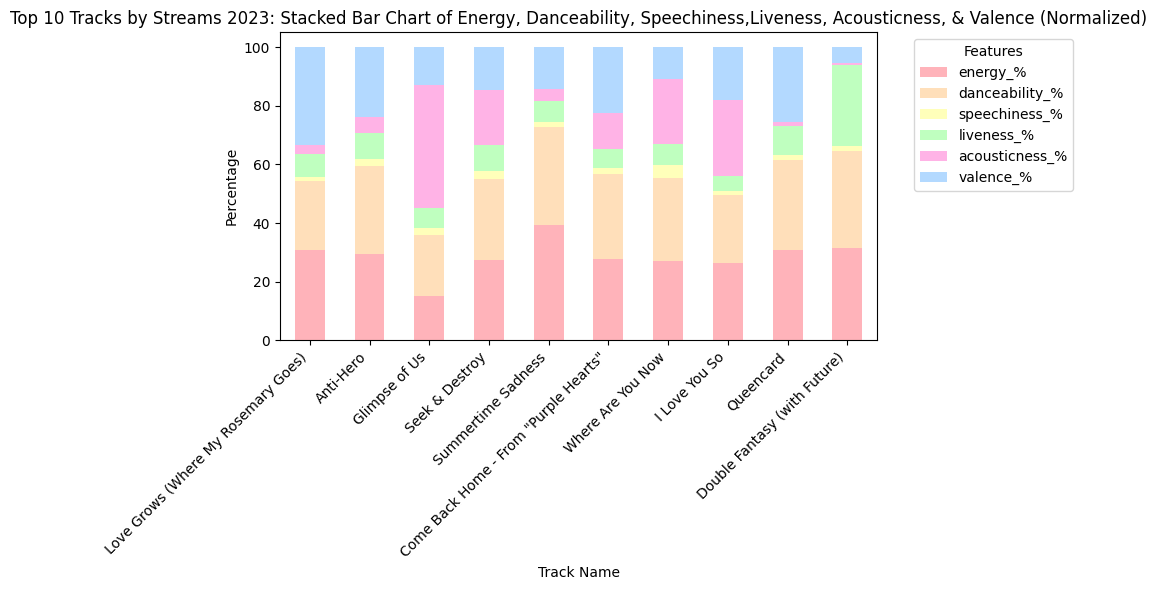

In [26]:
import matplotlib.pyplot as plt
# a list of colors for each feature
colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BFFFBF', '#FFB3E6', '#B3D9FF']# soft pastel colors
df_top10 = df.sort_values(by='streams', ascending=False).head(10) # getting top ten, removing some records just for easier visualization looked crazy with 923 on x axis lol

# normalize the data to make sure the sum of energy, danceability, and speechiness adds up to 100% for each track!
df_top10[['energy_%', 'danceability_%', 'speechiness_%','liveness_%', 'acousticness_%', 'valence_%']] = df_top10[['energy_%', 'danceability_%', 'speechiness_%','liveness_%', 'acousticness_%', 'valence_%']].div(df_top10[['energy_%', 'danceability_%', 'speechiness_%','liveness_%', 'acousticness_%', 'valence_%']].sum(axis=1), axis=0) * 100

# prepare the data for the stacked bar chart
df_stacked_top10 = df_top10[['track_name', 'energy_%', 'danceability_%', 'speechiness_%','liveness_%', 'acousticness_%', 'valence_%']].set_index('track_name')
# create the stacked bar chart
df_stacked_top10.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Top 10 Tracks by Streams 2023: Stacked Bar Chart of Energy, Danceability, Speechiness, Liveness, Acousticness, & Valence (Normalized)')
plt.xlabel('Track Name')
plt.ylabel('Percentage')
plt.legend(title='Features',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # rotate track names for better readability!
plt.tight_layout()
plt.show()

In [27]:
print(df_top10[['energy_%', 'danceability_%', 'speechiness_%','liveness_%', 'acousticness_%', 'valence_%']].min())
print(df_top10[['energy_%', 'danceability_%', 'speechiness_%','liveness_%', 'acousticness_%', 'valence_%']].max())

energy_%          15.165877
danceability_%    20.853081
speechiness_%      1.339286
liveness_%         5.138340
acousticness_%     0.552486
valence_%          5.524862
dtype: float64
energy_%          39.285714
danceability_%    33.333333
speechiness_%      4.237288
liveness_%        27.624309
acousticness_%    42.180095
valence_%         33.482143
dtype: float64


This information tracks given the previous outcome of our stacked bar chart

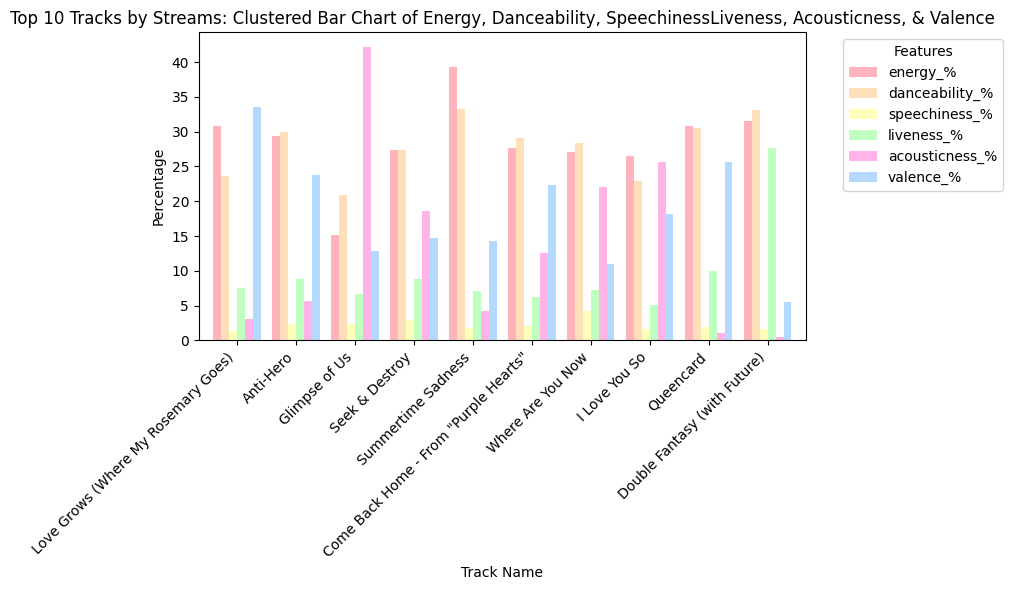

In [29]:
#colors for the bars in the clustered chart
colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BFFFBF', '#FFB3E6', '#B3D9FF']# soft pastel colors

# prepare the data for the clustered bar chart
df_clustered_top10 = df_top10[['track_name', 'energy_%', 'danceability_%', 'speechiness_%','liveness_%', 'acousticness_%', 'valence_%']].set_index('track_name')

#the clustered bar chart
ax = df_clustered_top10.plot(kind='bar', figsize=(10, 6), color=colors, width=0.8)
plt.title('Top 10 Tracks by Streams: Clustered Bar Chart of Energy, Danceability, SpeechinessLiveness, Acousticness, & Valence')
plt.xlabel('Track Name')
plt.ylabel('Percentage')
plt.legend(title='Features',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pair plot / scatterplot matrix

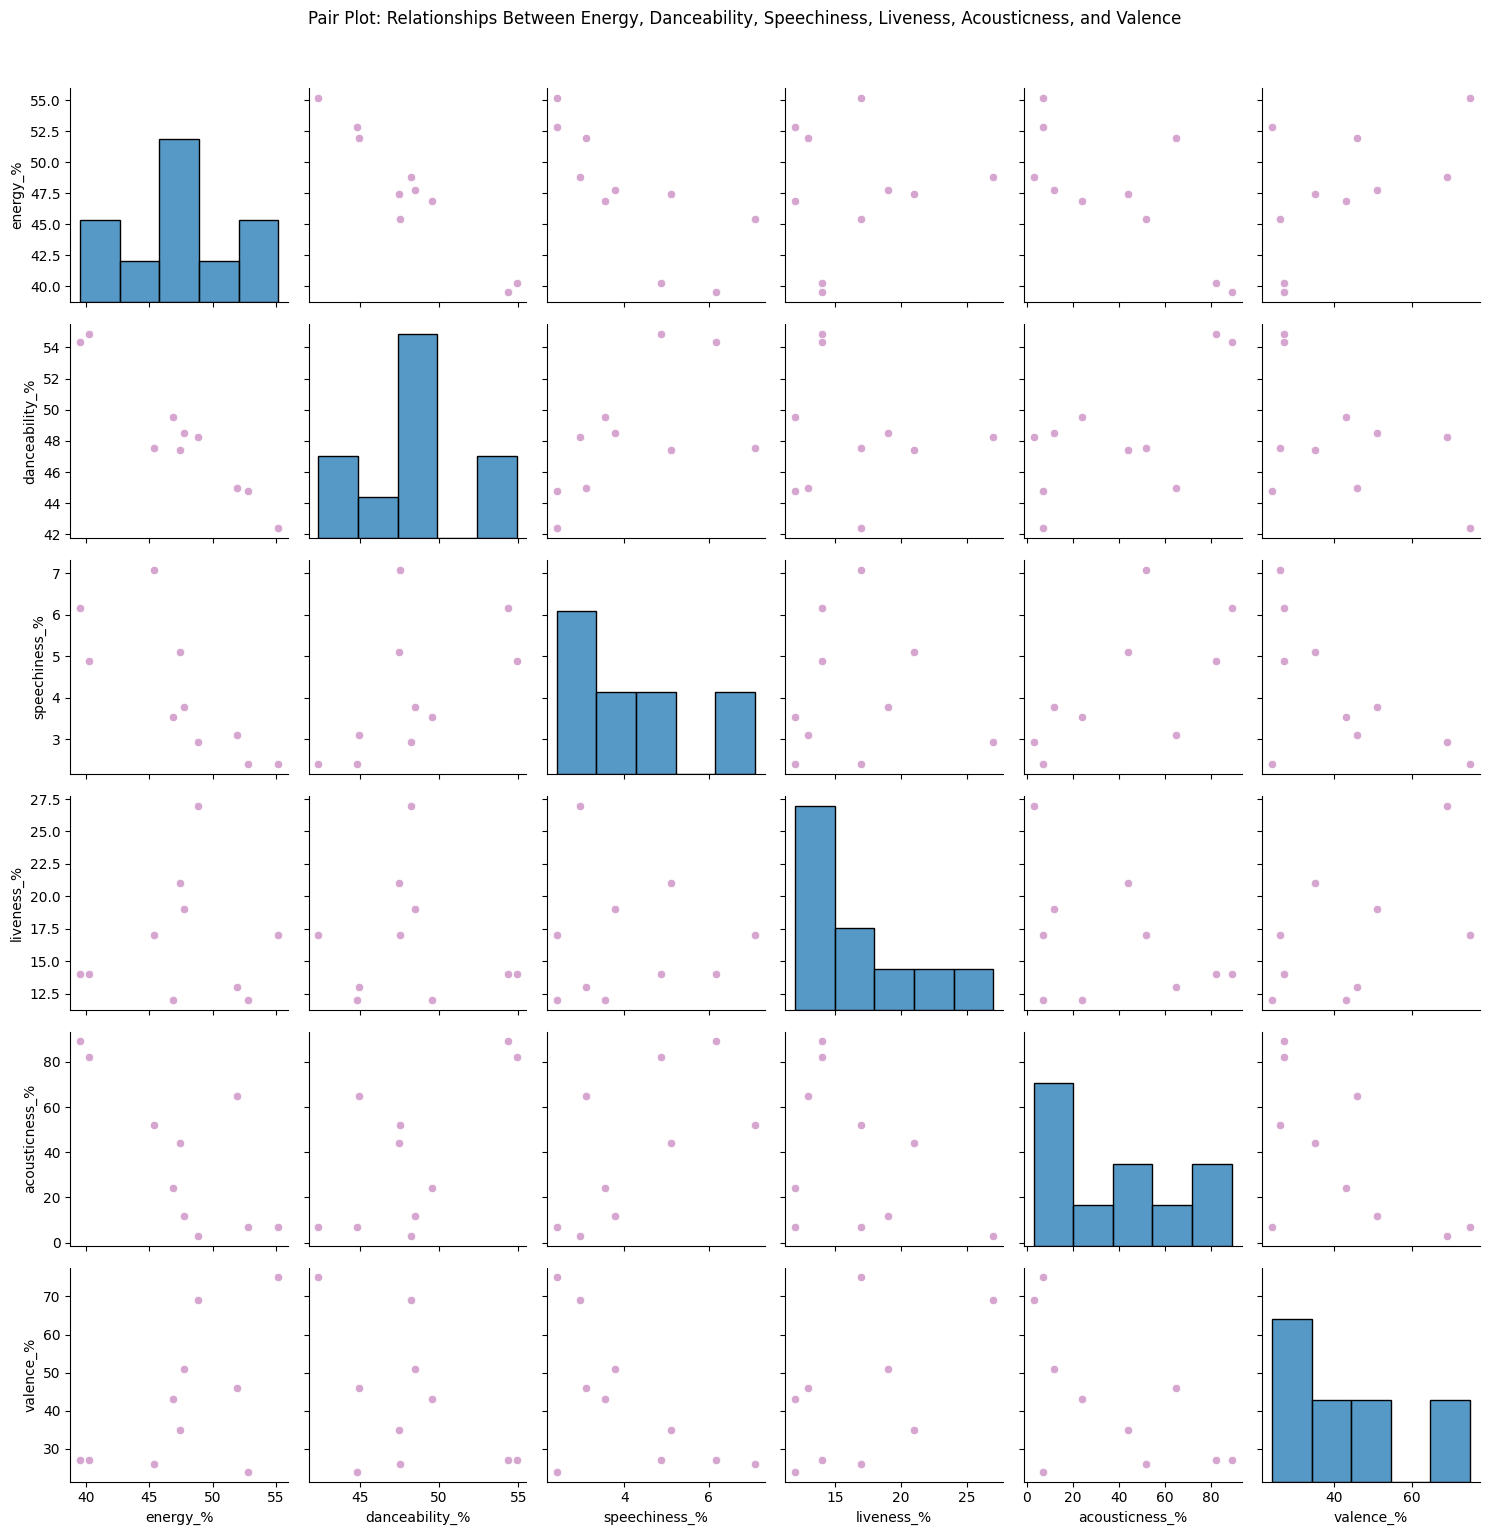

In [19]:
import seaborn as sns

#new dataframe that includes all six features of these different percentage types
df_pairplot_top10 = df_top10[['energy_%', 'danceability_%', 'speechiness_%', 'liveness_%', 'acousticness_%', 'valence_%']]

#the scatterplot matrix (pair plot) for the six features
sns.pairplot(df_pairplot_top10, kind='scatter', diag_kind='hist', plot_kws={'color': '#D6A6D1'})
plt.suptitle('Pair Plot: Relationships Between Energy, Danceability, Speechiness, Liveness, Acousticness, and Valence', y=1.02)
plt.tight_layout()
plt.show()

From distribution wise judging by the histograms, we see that the top 10 songs have interesting distributions - however, because we are only looking at the top ten specifically this is not the best sample size for interpretations. The only reason I made this into only 10 was to visualize the bar charts easier. However, we can try this again but using all to see a difference.

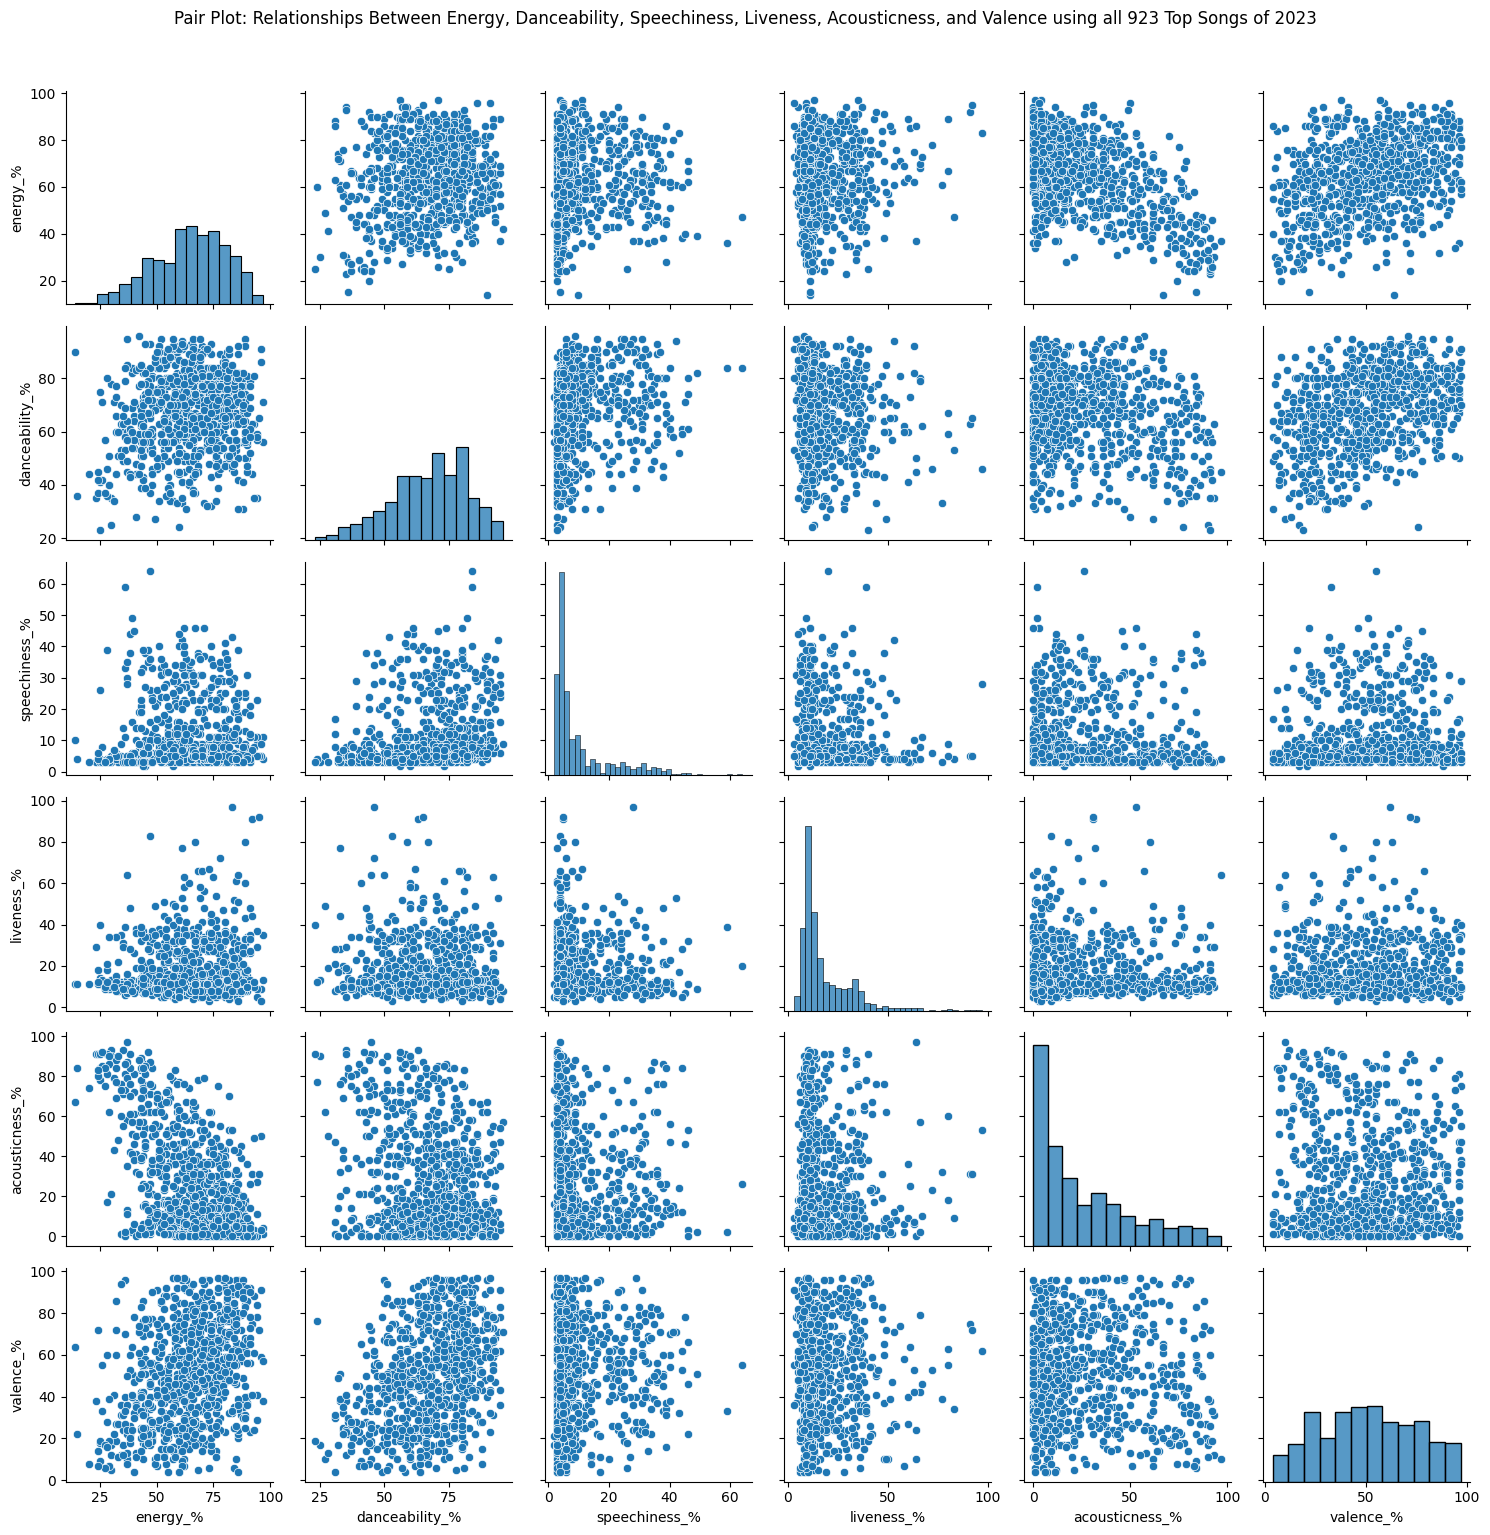

In [33]:
#new dataframe that includes all six features of these different percentage types
df_pairplot = df[['energy_%', 'danceability_%', 'speechiness_%', 'liveness_%', 'acousticness_%', 'valence_%']]

#the scatterplot matrix (pair plot) for the six features
sns.pairplot(df_pairplot, kind='scatter', diag_kind='hist')
plt.suptitle('Pair Plot: Relationships Between Energy, Danceability, Speechiness, Liveness, Acousticness, and Valence using all 923 Top Songs of 2023', y=1.02)
plt.tight_layout()
plt.show()

Now we can understand a better picture of the true picture of distributions as we have 923 values which give us an entirely different picture than the small sample size of 10 which is not reliable on a statistical level of a valid sample(not above 30). First, we see energy have a small shaped normal distribution that is a bit skewed to the right. We see dancability also skewed to the right following a general normal distribution though. Speechiness is extremely skewed to the left. Liveliness is also skewed to the left. Acousticness is also skewed to the left. Valence is interestingly enough more uniform as a distribution with in the main ranges of 15-40 without a distinct distribution shape.

So, what does this mean? This means that we can infer the left skewed distributions to on average have lower percentages which makes these song top songs and the more normal to right skewed distribution is the aspect that makes the song more popular or higher in the charts given this dataset is based on the top songs.

Therefore, we know that liveliness, acousticness, and speechiness tends to be less common to be a high percentage and likely a lower percentage in the music for top ten. Moreover, we know that energy and danceability have higher impact on being a top streamed song in popularity due to being more often in the higher to middle range of impact in its percentage form. Valence being more uniform with a less distinctive shape is interesting and likely means valence ranges on its impact on popular songs but typically is always is in a range not above 40%.